In [1]:
'''
!pip install tensorflow
!pip install opencv-python
!pip install opencv-contrib-python

'''

'\n!pip install tensorflow\n!pip install opencv-python\n!pip install opencv-contrib-python\n\n'

### FF Detection using CNN

In [2]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [3]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("Forest Fire Dataset\Training", target_size = (150,150),batch_size = 32, class_mode = 'binary')
test_dataset = test.flow_from_directory("Forest Fire Dataset\Testing", target_size = (150,150),batch_size = 32, class_mode = 'binary')

Found 1520 images belonging to 2 classes.
Found 380 images belonging to 2 classes.


In [5]:
train_dataset.class_indices

{'fire': 0, 'nofire': 1}

In [6]:
test_dataset.class_indices

{'fire': 0, 'nofire': 1}

In [7]:
#creating the CNN model

model = keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3), activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras. layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(keras. layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3), activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [8]:
#compile

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [10]:
#model fit

r = model.fit(train_dataset,epochs=5,validation_data=test_dataset)

Epoch 1/5


48/48 [==============================] - 56s 1s/step - loss: 0.3557 - accuracy: 0.8461 - val_loss: 0.1991 - val_accuracy: 0.9263
Epoch 2/5
48/48 [==============================] - 44s 905ms/step - loss: 0.1371 - accuracy: 0.9553 - val_loss: 0.1188 - val_accuracy: 0.9500
Epoch 3/5
48/48 [==============================] - 43s 891ms/step - loss: 0.1383 - accuracy: 0.9513 - val_loss: 0.1050 - val_accuracy: 0.9526
Epoch 4/5
48/48 [==============================] - 51s 1s/step - loss: 0.1038 - accuracy: 0.9632 - val_loss: 0.1515 - val_accuracy: 0.9553
Epoch 5/5
48/48 [==============================] - 50s 1s/step - loss: 0.0918 - accuracy: 0.9678 - val_loss: 0.0836 - val_accuracy: 0.9632


In [11]:
predictions = model.predict(test_dataset)
predictions = np.round(predictions)

12/12 [==============================] - 5s 358ms/step


In [12]:
predictions

array([[0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [13]:
print(len(predictions))

380


### Train score evaluation

In [14]:
batch_size=32
train_score = model.evaluate_generator(train_dataset, batch_size)
print("[INFO] Training accuracy: {:.2f}%".format(train_score[1] * 100))
print("[INFO] Training Loss: ",train_score[0])

C:\Users\chand\AppData\Local\Temp\ipykernel_20592\2061500336.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  train_score = model.evaluate_generator(train_dataset, batch_size)


[INFO] Training accuracy: 98.14%
[INFO] Training Loss:  0.0611930750310421


### Test score evaluation

In [15]:
test_score = model.evaluate_generator(test_dataset, batch_size)
print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100))
print("[INFO] Loss: ",test_score[0])

C:\Users\chand\AppData\Local\Temp\ipykernel_20592\1625143466.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_score = model.evaluate_generator(test_dataset, batch_size)


[INFO] accuracy: 96.32%
[INFO] Loss:  0.08355515450239182


### Plotting Loss and accuracy 

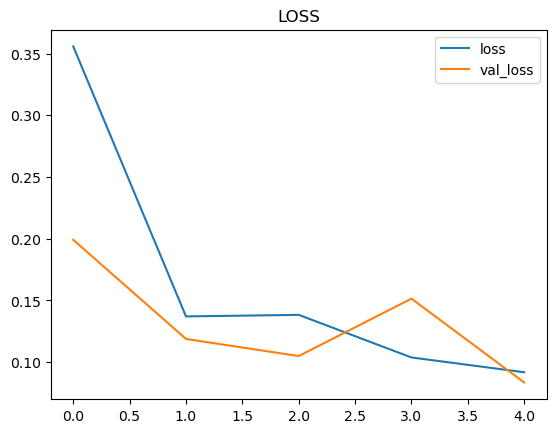

In [16]:
import matplotlib.pyplot as plt

plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.title("LOSS")
plt.legend();

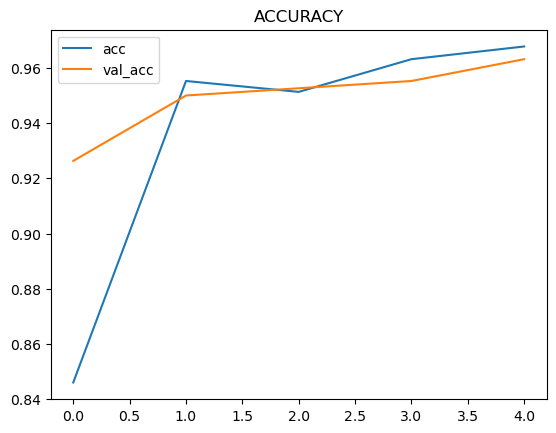

In [17]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.title("ACCURACY")
plt.legend();

### Classifying whether it is fire or no fire image.

In [19]:
#Take images from DB and check results on it.

def predictImage(filename):
    img = image.load_img(filename,target_size=(150,150))
    plt.imshow(img)
    Y = image.img_to_array(img)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if(val == 1):
        plt.xlabel("No Fire",fontsize=30)
    elif(val==0):
        plt.xlabel("Fire",fontsize=30)

1/1 [==============================] - 0s 234ms/step
[[0.]]


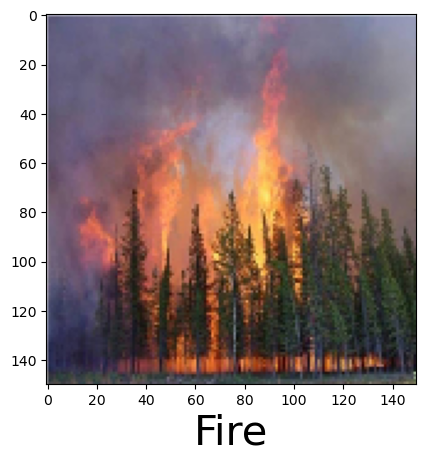

In [20]:
predictImage(r"Forest Fire Dataset\Testing\fire\fire_0229.jpg")

1/1 [==============================] - 0s 78ms/step
[[1.]]


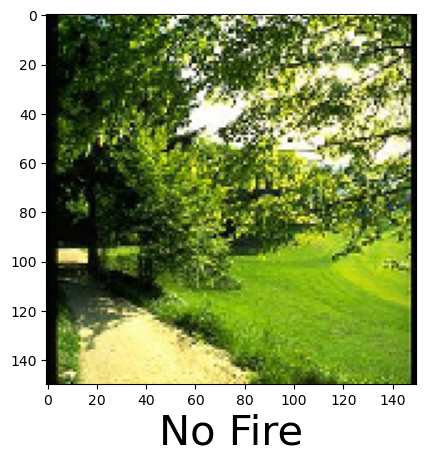

In [21]:
predictImage(r"Forest Fire Dataset\Testing\nofire\nofire_0112.jpg")

### Confusion Matrix

Confusion Matrix
Normalized confusion matrix
Classification Report
              precision    recall  f1-score   support

        fire       0.50      1.00      0.67       190
      nofire       0.00      0.00      0.00       190

    accuracy                           0.50       380
   macro avg       0.25      0.50      0.33       380
weighted avg       0.25      0.50      0.33       380



C:\Users\chand\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chand\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chand\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


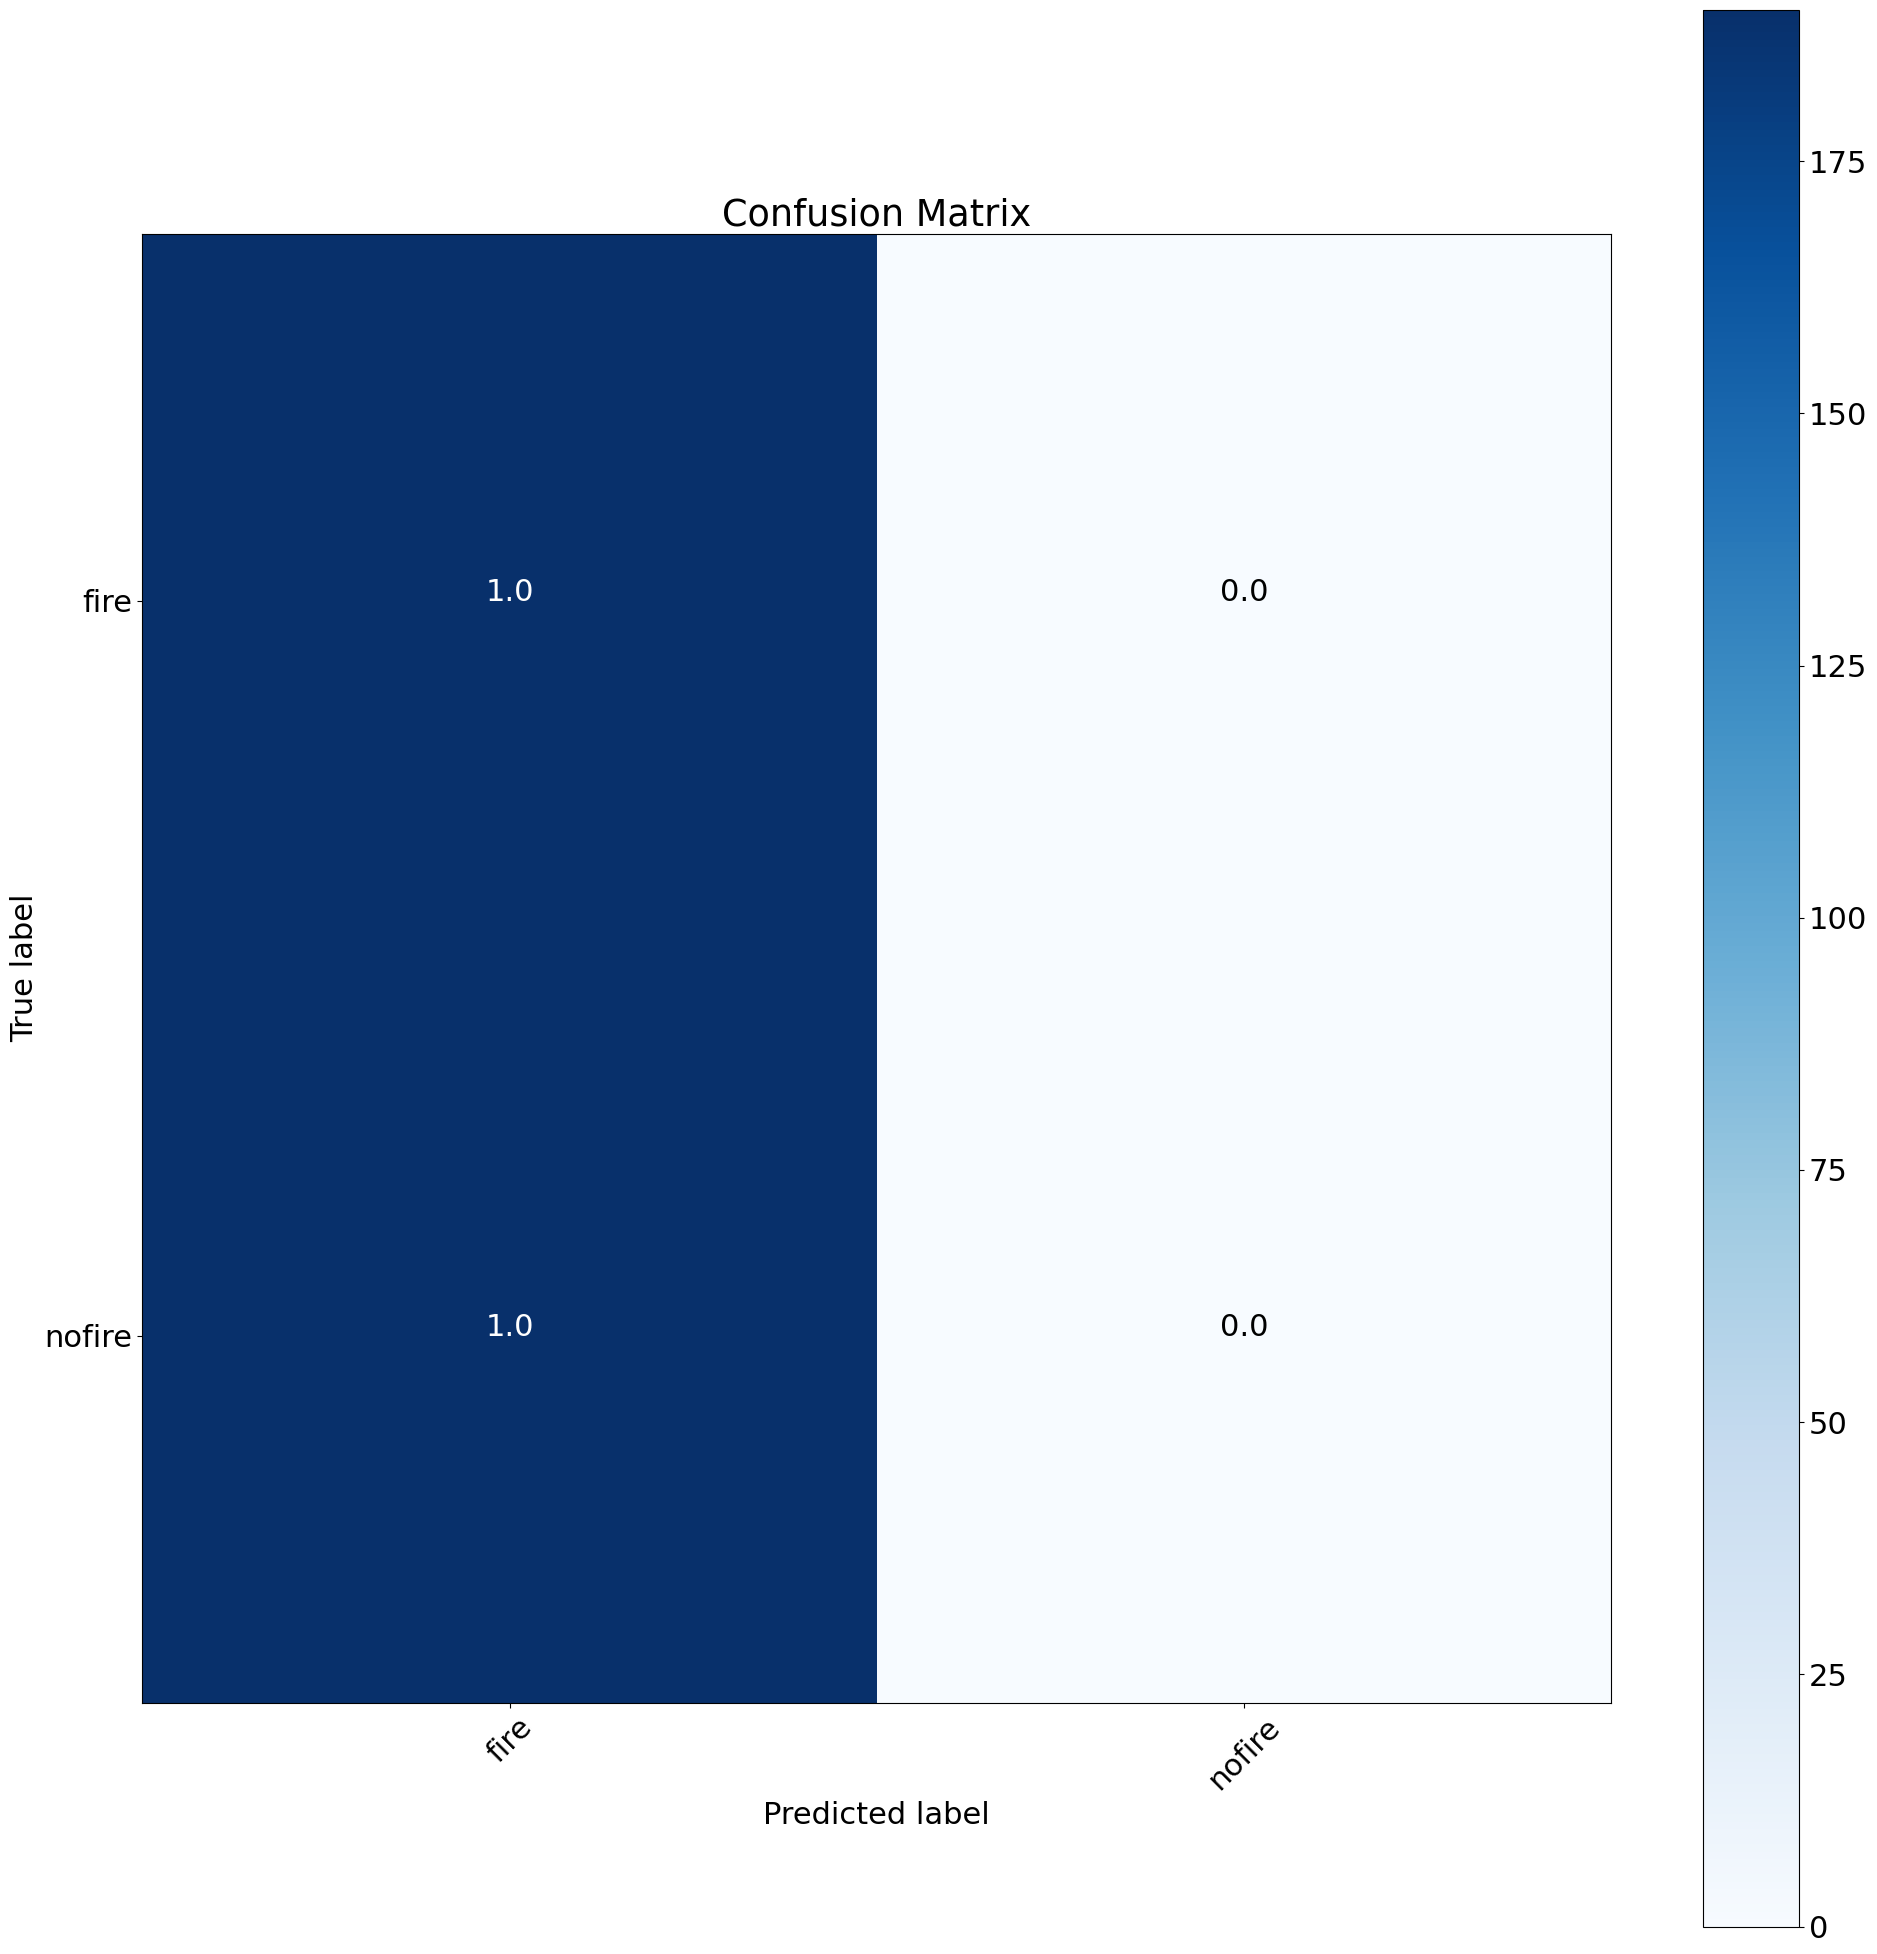

In [23]:
#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(20,20))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#Print the Target names
from sklearn.metrics import classification_report, confusion_matrix
import itertools 
#shuffle=False
target_names = []
for key in train_dataset.class_indices:
    target_names.append(key)
# print(target_names)
#Confution Matrix

y_pred = np.argmax(predictions, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_dataset.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')
plt.rcParams.update({'font.size': 22})
#Print Classification Report
print('Classification Report')
print(classification_report(test_dataset.classes, y_pred, target_names=target_names))

### Heatmap detection of a fire image

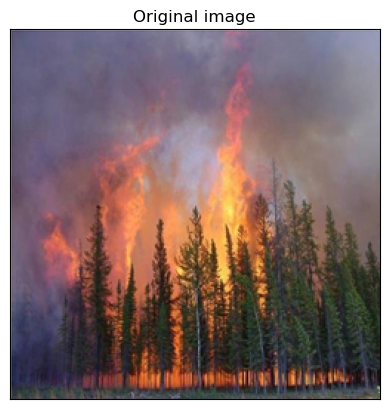

In [47]:
img_path=r"Forest Fire Dataset\Testing\fire\fire_0229.jpg"
img=cv2.imread(img_path)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img);
plt.xticks([]);
plt.yticks([]);
plt.title("Original image",fontsize="12");

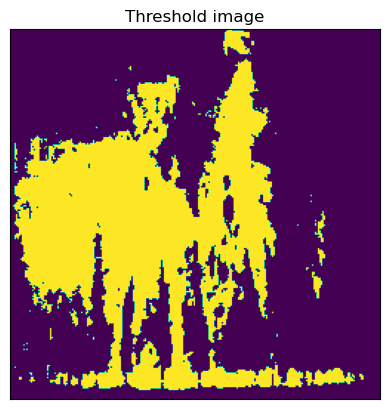

In [48]:
# obtained a binary image after performing binary threshold on the a-channel of the LAB converted image
lab=cv2.cvtColor(img,cv2.COLOR_RGB2LAB)
a_component=lab[:,:,1]
threshold=cv2.threshold(a_component,140,255,cv2.THRESH_BINARY)[1]
plt.imshow(threshold);
plt.xticks([]);
plt.yticks([]);
plt.title("Threshold image",fontsize="12");

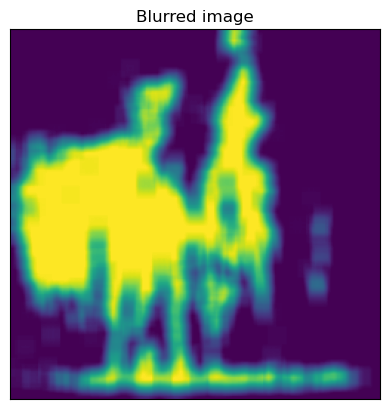

In [49]:
#Applying Gaussian Blur filter
blur = cv2.GaussianBlur(threshold,(13,13), 11)
plt.imshow(blur);
plt.xticks([]);
plt.yticks([]);
plt.title("Blurred image",fontsize="12");

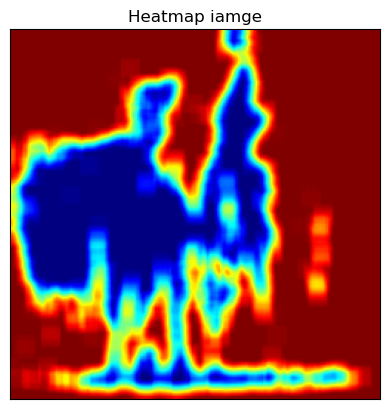

In [50]:
heatmap_img = cv2.applyColorMap(blur,cv2.COLORMAP_JET)
plt.imshow(heatmap_img);
plt.xticks([]);
plt.yticks([]);
plt.title("Heatmap image",fontsize="12");

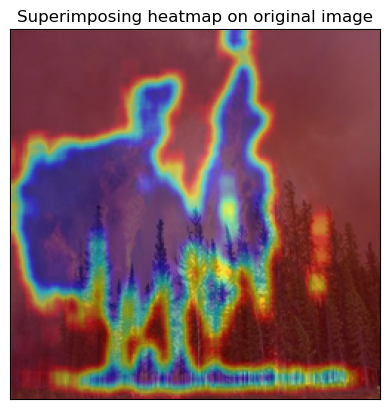

In [51]:
superimposed_heatmap=cv2.addWeighted(heatmap_img,0.5,img,0.5,0)
plt.imshow(superimposed_heatmap);
plt.xticks([]);
plt.yticks([]);
plt.title("Superimposing heatmap on original image",fontsize="12");